In [207]:
import pandas as pd
import json
import matplotlib.pyplot as plt

The tweets from President Trump's twitter account used for this word cloud are from the Date Nov 9th 2016 till July 21 2017.If you want to download the tweets and run this yourself you have 2 choices:

1. You can use a scraper and download them directly from the twitter website [using this code] [src] OR
2. You can use Brendan Brown's [website] [wb](which is what I did) since he logs President Trump's tweets in real time

For the sake of keeping the word cloud relevant I've dropped the following words:

* 'https://'
* 'co'
* 'will'
* 'amp'
* 'today'
* 'people'
* 'going'
* 'Thank'
* 'always'
* 'now'
* 'thing'
* 'said'
* 'say'

For some odd reason I wasn't able to get the "stop words" to work for some of these words and had to write a "replace"

[src]:https://github.com/bpb27/twitter_scraping
[wb]:http://www.trumptwitterarchive.com/

In [94]:
#Load the tweets from 2016
filename = "condensed_2016.json"
with open(filename) as data_file:    
    data = json.load(data_file)
Tweet_DF1=pd.DataFrame(data)

In [97]:
Tweet_DF1.dtypes

created_at                 object
favorite_count              int64
id_str                     object
in_reply_to_user_id_str    object
is_retweet                   bool
retweet_count               int64
source                     object
text                       object
dtype: object

In [98]:
#Change the created_at column to date time
Tweet_DF1['created_at'] =  pd.to_datetime(Tweet_DF1['created_at'])

In [99]:
Tweet_DF1.head()

,created_at,favorite_count,id_str,in_reply_to_user_id_str,is_retweet,retweet_count,source,text
0,2016-12-31 18:59:04,0,815271067749060609,None,True,9529,Twitter for iPhone,RT @realDonaldTrump: Happy Birthday @DonaldJTr...
1,2016-12-31 18:58:12,55601,815270850916208644,None,False,9529,Twitter for iPhone,Happy Birthday @DonaldJTrumpJr!\nhttps://t.co/...
2,2016-12-31 13:17:21,350860,815185071317676033,None,False,141853,Twitter for Android,"Happy New Year to all, including to my many en..."
3,2016-12-30 22:18:18,84254,814958820980039681,None,False,23213,Twitter for Android,Russians are playing @CNN and @NBCNews for suc...
4,2016-12-30 19:46:55,25336,814920722208296960,None,False,7366,Twitter for iPhone,"Join @AmerIcan32, founded by Hall of Fame lege..."


In [106]:
#Pick only tweets from the 9th of Nov 2016
Tweet_DF2=Tweet_DF1[(Tweet_DF1['created_at'] > '2016-11-08 23:59:59')]

In [111]:
#Load the tweets from 2017
filename = "condensed_2017.json"
with open(filename) as data_file:    
    data = json.load(data_file)
Tweet_DF3=pd.DataFrame(data)
Tweet_DF3['created_at'] =  pd.to_datetime(Tweet_DF['created_at'])

In [112]:
Tweet_DF3.head()

,created_at,favorite_count,id_str,in_reply_to_user_id_str,is_retweet,retweet_count,source,text
0,2017-07-21 03:31:45,21510,888240051599134721,None,False,5340,Twitter for iPhone,Billions of dollars in investments &amp; thous...
1,2017-07-20 20:08:58,83522,888128621784838144,None,False,23790,Media Studio,I am asking all citizens to believe in yoursel...
2,2017-07-20 17:27:40,45567,888088029428150272,None,False,10472,Twitter for iPhone,Departing The Pentagon after meetings with @VP...
3,2017-07-20 02:33:15,75942,887862941109940225,None,False,14753,Twitter for iPhone,Melania and I send our thoughts and prayers to...
4,2017-07-19 12:46:14,69440,887654816507408384,None,False,15339,Twitter for iPhone,The Republicans never discuss how good their h...


In [114]:
Tweet_DF3.tail()

,created_at,favorite_count,id_str,in_reply_to_user_id_str,is_retweet,retweet_count,source,text
1143,2017-01-01 06:49:33,0,815449868739211265,None,True,6847,Twitter for iPhone,RT @DonaldJTrumpJr: Happy new year everyone. #...
1144,2017-01-01 05:44:17,0,815433444591304704,None,True,6941,Twitter for iPhone,RT @EricTrump: 2016 was such an incredible yea...
1145,2017-01-01 05:43:23,0,815433217595547648,None,True,7144,Twitter for iPhone,RT @Reince: Happy New Year + God's blessings t...
1146,2017-01-01 05:39:13,0,815432169464197121,None,True,5548,Twitter for iPhone,RT @DanScavino: On behalf of our next #POTUS &...
1147,2017-01-01 05:00:10,126230,815422340540547073,None,False,32665,Twitter for iPhone,TO ALL AMERICANS-\n#HappyNewYear &amp; many bl...


In [118]:
# Merge the tweets from 2016 (post 8th Nov) and 2017 to one data frame
Tweet_DF=Tweet_DF3.append(Tweet_DF2,ignore_index=True)

In [119]:
Tweet_DF.head()

,created_at,favorite_count,id_str,in_reply_to_user_id_str,is_retweet,retweet_count,source,text
0,2017-07-21 03:31:45,21510,888240051599134721,None,False,5340,Twitter for iPhone,Billions of dollars in investments &amp; thous...
1,2017-07-20 20:08:58,83522,888128621784838144,None,False,23790,Media Studio,I am asking all citizens to believe in yoursel...
2,2017-07-20 17:27:40,45567,888088029428150272,None,False,10472,Twitter for iPhone,Departing The Pentagon after meetings with @VP...
3,2017-07-20 02:33:15,75942,887862941109940225,None,False,14753,Twitter for iPhone,Melania and I send our thoughts and prayers to...
4,2017-07-19 12:46:14,69440,887654816507408384,None,False,15339,Twitter for iPhone,The Republicans never discuss how good their h...


In [120]:
Tweet_DF.tail()

,created_at,favorite_count,id_str,in_reply_to_user_id_str,is_retweet,retweet_count,source,text
1374,2016-11-11 02:10:46,192638,796897928048766976,None,False,37788,Twitter for Android,A fantastic day in D.C. Met with President Oba...
1375,2016-11-10 19:31:27,169729,796797436752707585,None,False,45576,Twitter for iPhone,Happy 241st birthday to the U.S. Marine Corps!...
1376,2016-11-09 11:36:58,633253,796315640307060738,None,False,220796,Twitter for Android,Such a beautiful and important evening! The fo...
1377,2016-11-09 02:48:27,190930,796182637622816768,None,False,45335,Twitter for iPhone,Watching the returns at 9:45pm. \n#ElectionNig...
1378,2016-11-09 01:35:15,0,796164216294084608,None,True,17610,Twitter for iPhone,RT @IvankaTrump: Such a surreal moment to vote...


In [121]:
# Import the word cloub lib
from wordcloud import WordCloud, STOPWORDS

In [199]:
# add the stop words
stopwords = set(STOPWORDS)
stopwords.add("always")
stopwords.add("now")
stopwords.add("thing")
stopwords.add("said")
stopwords.add("say")

In [200]:
wc = WordCloud(background_color="white", max_words=2000,stopwords=stopwords)

In [205]:
text2=' '.join(Tweet_DF['text']).replace('https://', '').replace('co', '').replace('will', '').replace('amp', '').replace('today', '').replace('people', '').replace('going', '').replace('Thank', '')
wordcloud2 = WordCloud(width=800, height=400).generate(text2)

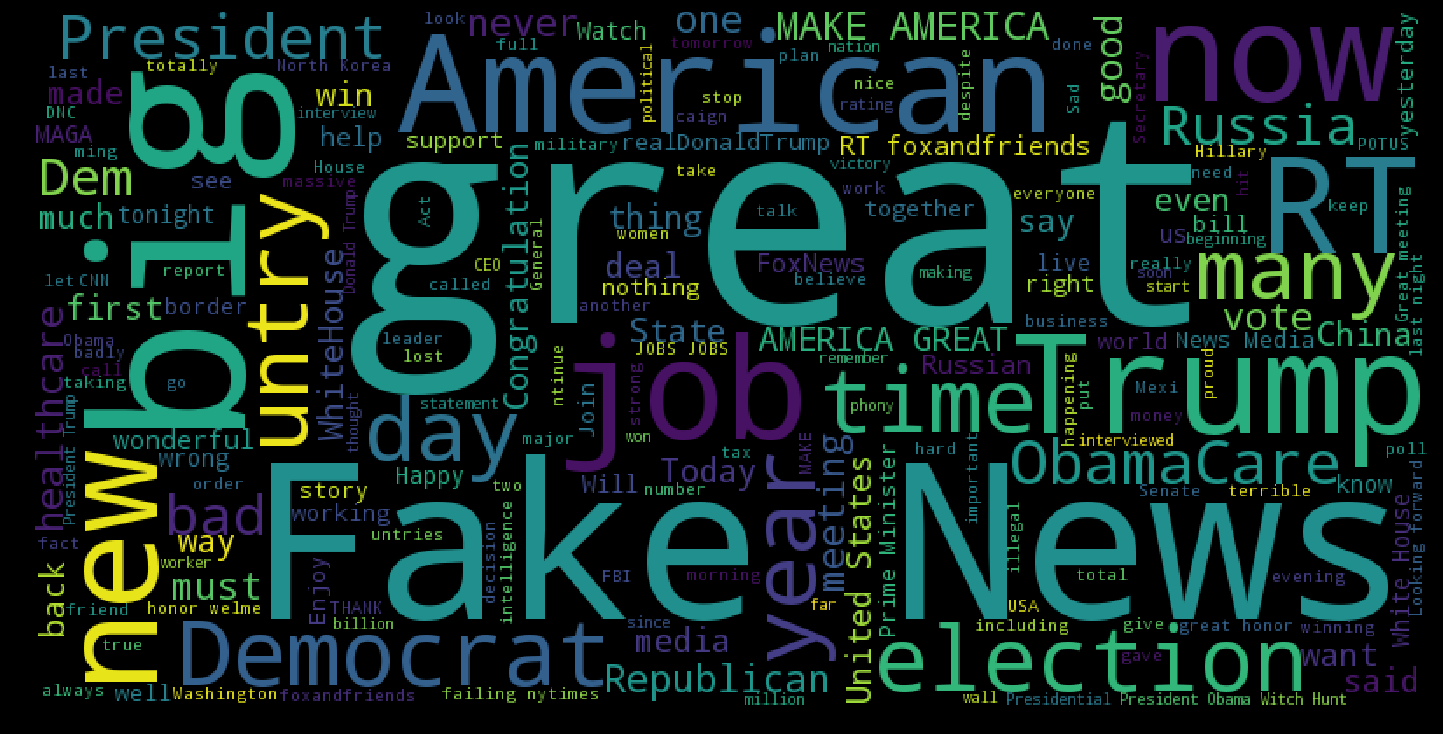

In [206]:
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud2)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()